# Quais fatores econômicos ou sociais lavam a um maior sucesso eleitoral dos candidatos?

### Datasets Utilizados
* Candidatos
* Eleições
* Resultados de Eleições

## Importando Bibliotecas

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dados

### Candidatos

In [3]:
candidatos_df = pd.read_csv('datasets/cand_rs_2022.csv', encoding='latin1', sep=';')

candidatos_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA_ELEICAO,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,596,AUXILIAR DE LABORATÓRIO,4,NÃO ELEITO
1,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,4,ENSINO FUNDAMENTAL COMPLETO,3,CASADO(A),1,BRANCA,601,AGRICULTOR,4,NÃO ELEITO
2,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,703,ELETRICISTA E ASSEMELHADOS,4,NÃO ELEITO
3,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,7,SUPERIOR INCOMPLETO,1,SOLTEIRO(A),1,BRANCA,910,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,5,SUPLENTE
4,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,4,ENSINO FUNDAMENTAL COMPLETO,3,CASADO(A),1,BRANCA,910,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,5,SUPLENTE


In [4]:
candidatos_df.columns


Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [ ]:
CANDIDATOS_FEATURES = [
    'NM_CANDIDATO',
    'TP_ABRANGENCIA_ELEICAO',
    'DS_CARGO',
    'NR_TURNO',
    'NR_CANDIDATO',
    'SG_PARTIDO',
    'NR_PARTIDO',
    'CD_ELEICAO',
    'SG_UF',
    'SQ_CANDIDATO',
    'DT_NASCIMENTO', # transformar em idade
    # variáveis categóricas interessantes
    'DS_GENERO',
    'DS_GRAU_INSTRUCAO',
    'DS_ESTADO_CIVIL',
    'DS_COR_RACA',
    'DS_OCUPACAO',
    'DS_SIT_TOT_TURNO', 
]

### Despesas Candidatos

In [8]:
despesas_contratadas_df = pd.read_csv('datasets/desp_cand_contratadas_2022.csv', encoding='latin1', sep=';');

despesas_contratadas_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,SG_PARTIDO_FORNECEDOR,NM_PARTIDO_FORNECEDOR,DS_TIPO_DOCUMENTO,NR_DOCUMENTO,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,SQ_DESPESA,DT_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Outro,2,20010000,Despesas com pessoal,48528896,14/09/2022,SERVÇOS DE COORDENAÇÃO,"1700,00"
1,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Nota Fiscal,1478,20100000,Combustíveis e lubrificantes,50553617,05/10/2022,GASOLINA ORIGINAL IPIRANGA,"142,40"
2,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Nota Fiscal,1486,20100000,Combustíveis e lubrificantes,50361517,02/10/2022,GASOLINA,"257,31"
3,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Nota Fiscal,1352,20100000,Combustíveis e lubrificantes,50361709,13/09/2022,GASOLINA,"249,50"
4,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Outro,1,20010000,Despesas com pessoal,49490731,17/08/2022,COORDENADOR MUNICIPAL-ESTRELA,"7500,00"


In [17]:
despesas_contratadas_df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'SG_UE', 'NM_UE', 'NR_CNPJ_PRESTADOR_CONTA', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NR_CPF_CANDIDATO', 'NR_CPF_VICE_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'CD_TIPO_FORNECEDOR', 'DS_TIPO_FORNECEDOR',
       'CD_CNAE_FORNECEDOR', 'DS_CNAE_FORNECEDOR', 'NR_CPF_CNPJ_FORNECEDOR',
       'NM_FORNECEDOR', 'NM_FORNECEDOR_RFB', 'CD_ESFERA_PART_FORNECEDOR',
       'DS_ESFERA_PART_FORNECEDOR', 'SG_UF_FORNECEDOR',
       'CD_MUNICIPIO_FORNECEDOR', 'NM_MUNICIPIO_FORNECEDOR',
       'SQ_CANDIDATO_FORNECEDOR', 'NR_CANDIDATO_FORNECEDOR',
       'CD_CARGO_FORNECEDOR', 'DS_CARGO_FORNECEDOR', 'NR_PARTIDO_FORNECEDOR',
       'SG_PARTIDO_FORNECEDOR', 'NM_PARTIDO_FORNECEDOR', 'DS_TIPO_DOCUMENTO',
     

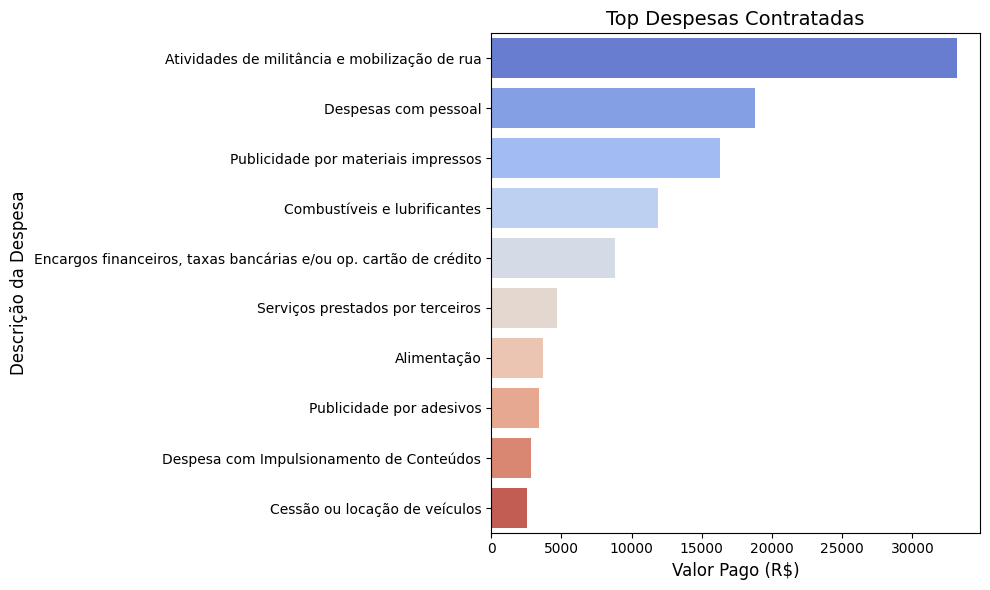

In [50]:
top_despesas_contratadas_df = despesas_contratadas_df['DS_ORIGEM_DESPESA'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_despesas_contratadas_df.values, y=top_despesas_contratadas_df.index, palette='coolwarm')

plt.title('Top Despesas Contratadas', fontsize=14)
plt.xlabel('Valor Pago (R$)', fontsize=12)
plt.ylabel('Descrição da Despesa', fontsize=12)

plt.tight_layout()
plt.show()



In [11]:
despesas_pagas_df = pd.read_csv('datasets/desp_cand_pagas_2022.csv', encoding='latin1', sep=';')

despesas_pagas_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,DS_ORIGEM_DESPESA,CD_NATUREZA_DESPESA,DS_NATUREZA_DESPESA,CD_ESPECIE_RECURSO,DS_ESPECIE_RECURSO,SQ_DESPESA,SQ_PARCELAMENTO_DESPESA,DT_PAGTO_DESPESA,DS_DESPESA,VR_PAGTO_DESPESA
0,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526877,27/09/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"
1,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526878,28/09/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"
2,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526879,29/09/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"
3,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526880,30/09/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"
4,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526881,01/10/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"


In [28]:
despesas_pagas_df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'DS_TIPO_DOCUMENTO', 'NR_DOCUMENTO', 'CD_FONTE_DESPESA',
       'DS_FONTE_DESPESA', 'CD_ORIGEM_DESPESA', 'DS_ORIGEM_DESPESA',
       'CD_NATUREZA_DESPESA', 'DS_NATUREZA_DESPESA', 'CD_ESPECIE_RECURSO',
       'DS_ESPECIE_RECURSO', 'SQ_DESPESA', 'SQ_PARCELAMENTO_DESPESA',
       'DT_PAGTO_DESPESA', 'DS_DESPESA', 'VR_PAGTO_DESPESA'],
      dtype='object')

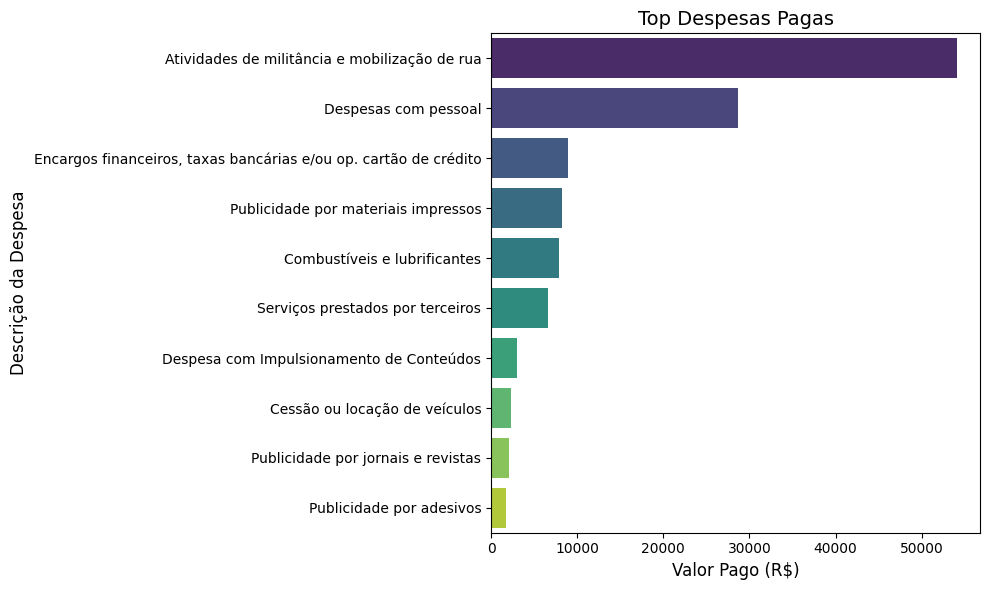

In [51]:
top_despesas_pagas_df = despesas_pagas_df['DS_ORIGEM_DESPESA'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_despesas_pagas_df.values, y=top_despesas_pagas_df.index, palette='viridis')

plt.title('Top Despesas Pagas', fontsize=14)
plt.xlabel('Valor Pago (R$)', fontsize=12)
plt.ylabel('Descrição da Despesa', fontsize=12)

plt.tight_layout()
plt.show()

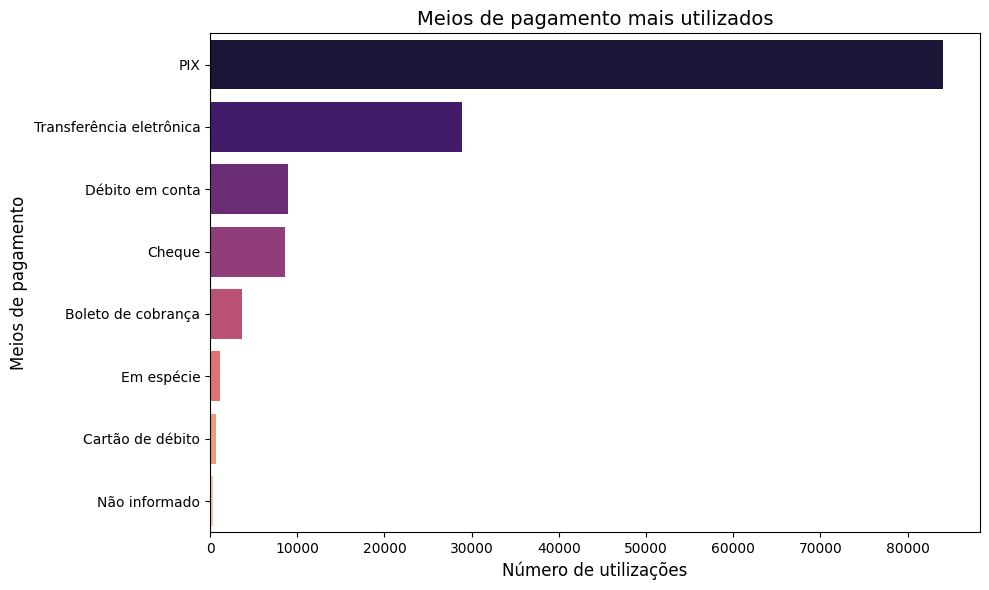

In [47]:
top_despesas_pagas_df = despesas_pagas_df['DS_ESPECIE_RECURSO'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_despesas_pagas_df.values, y=top_despesas_pagas_df.index, palette='magma')

plt.title('Meios de pagamento mais utilizados', fontsize=14)
plt.ylabel('Meios de pagamento', fontsize=12)
plt.xlabel('Número de utilizações', fontsize=12)

plt.tight_layout()
plt.show()